56.82358444633259


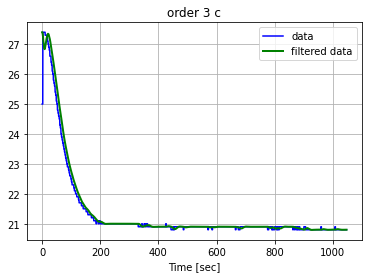

In [126]:
import numpy as np
from scipy.signal import butter, lfilter, freqz,lfilter_zi
import matplotlib.pyplot as plt
import pandas as pd


def butter_lowpass(cutoff_low, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff_low / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a)
    y,z0 = lfilter(b, a, data,zi=zi*max(data))
    # bd =  pd.DataFrame(y)
    # tmm = bd.rolling(4).mean()#.replace(np.nan, max(data))
    # print(tmm)
    # y = np.array(tmm.values)
    return y


order = 3
bd = pd.read_csv("../Dados/31KHz/PWM70V2.csv", delimiter=';')
t = np.array(bd['time(s)'].values)
fs = len(t)/(t[len(t)-1])#64#31250#len(t)/T
t = np.array(bd['time(s)'].values)
data = np.array(bd['temp'].values)

# Filtering and plotting
cutoff_low = 0.04
y = butter_lowpass_filter(data, cutoff_low, fs, order)
print(len(t)/(t[len(t)-1]))
# plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.title('order {} c'.format(order))
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

[1228728.8          19852.16189425   20390.81536434 ...   17357.42985638
   20390.81536434   19852.16189425]


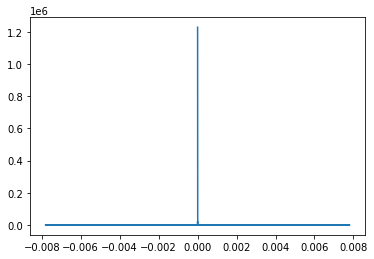

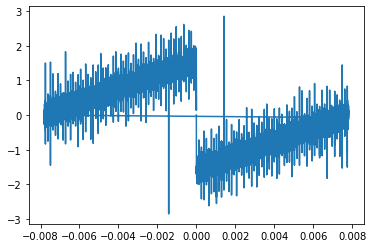

In [100]:
import numpy as np
from scipy.signal import butter, lfilter, freqz,lfilter_zi
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

bd = pd.read_csv("../Dados/31KHz/PWM70V3.csv", delimiter=';')
data = np.array(bd['temp'].values)
Y    = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), 64)
print(np.abs(Y))
plt.figure()
plt.plot( freq, np.abs(Y) )
plt.figure()
plt.plot(freq, np.angle(Y) )
plt.show()

63012


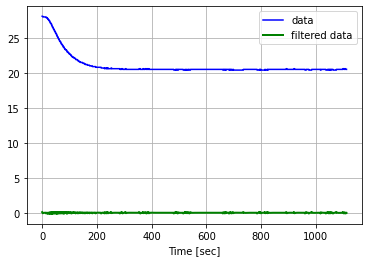

In [20]:
import numpy as np
from scipy.signal import butter, lfilter, freqz,lfilter_zi
import matplotlib.pyplot as plt
import pandas as pd


def butter_lowpass(cutoff_low, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff_low / nyq
    normal_cutoff = cutoff_high / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a)
    y,z0 = lfilter(b, a, data,zi=zi*28)
    return y




# b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
# w, h = freqz(b, a, worN=8000)
# plt.subplot(2, 1, 1)
# plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
# plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
# plt.axvline(cutoff, color='k')
# plt.xlim(0, 0.5*fs)
# plt.title("Lowpass Filter Frequency Response")
# plt.xlabel('Frequency [Hz]')
# plt.grid()


# Creating the data for filteration
bd = pd.read_csv("../Dados/31KHz/PWM70V1.csv", delimiter=';')
t = np.array(bd['time(s)'].values)
T = 5.0         # value taken in seconds
# n = int(T * fs) # indicates total samples
# Setting standard filter requirements.
order = 2
fs = len(t)/T       
cutoff_low = 1
cutoff_high = 10  
data = np.array(bd['temp'].values) ##np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filtering and plotting
y = butter_lowpass_filter(data, cutoff_low, fs, order)
print(len(y))
# plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()